In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('amazon_reviews.csv')  # Replace with your dataset path


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kisla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Handle missing values
df.dropna(subset=['review'], inplace=True)

# Add a sentiment label (1: positive, 0: neutral, -1: negative)
def assign_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

df['sentiment'] = df['rating'].apply(assign_sentiment)

# Clean the review text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)


In [3]:
# Split the dataset into training and testing
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Convert text into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [5]:
# Use a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.48      0.63       125
           0       0.00      0.00      0.00        50
           1       0.77      0.99      0.87       381

    accuracy                           0.79       556
   macro avg       0.56      0.49      0.50       556
weighted avg       0.74      0.79      0.74       556



d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


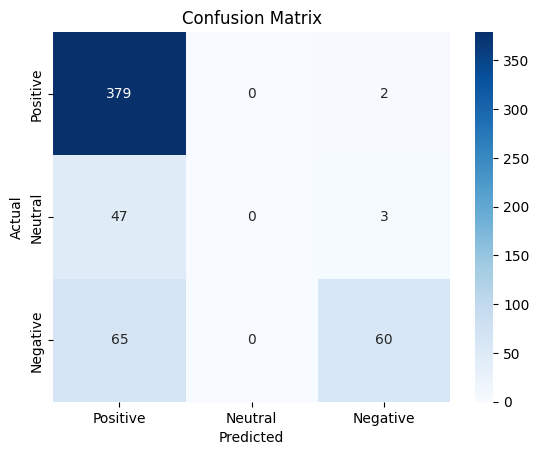

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Function to extract aspects (e.g., camera, battery)
def extract_aspects(review):
    aspects = []
    # Define keywords for aspects
    keywords = {'camera': ['camera', 'photo', 'picture'],
                'battery': ['battery', 'charge', 'power'],
                'price': ['price', 'cost', 'expensive']}
    for aspect, words in keywords.items():
        if any(word in review for word in words):
            aspects.append(aspect)
    return aspects

df['aspects'] = df['cleaned_review'].apply(extract_aspects)

# Filter reviews by specific aspects for ABSA
camera_reviews = df[df['aspects'].apply(lambda x: 'camera' in x)]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
nb_preds = model.predict(X_test_tfidf)  # Naive Bayes
dt_preds = dt_model.predict(X_test_tfidf)  # Decision Tree
rf_preds = rf_model.predict(X_test_tfidf)  # Random Forest


In [9]:
from sklearn.metrics import accuracy_score

# Evaluate each model
models = {
    "Naive Bayes": nb_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds
}

for model_name, preds in models.items():
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


Model: Naive Bayes
Accuracy: 0.789568345323741
Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.48      0.63       125
           0       0.00      0.00      0.00        50
           1       0.77      0.99      0.87       381

    accuracy                           0.79       556
   macro avg       0.56      0.49      0.50       556
weighted avg       0.74      0.79      0.74       556

Model: Decision Tree
Accuracy: 0.9514388489208633
Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.92      0.92       125
           0       0.95      0.82      0.88        50
           1       0.96      0.98      0.97       381

    accuracy                           0.95       556
   macro avg       0.94      0.91      0.92       556
weighted avg       0.95      0.95      0.95       556

Model: Random Forest
Accuracy: 0.9658273381294964
Classification Report:
               preci

d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hub\MLmodel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


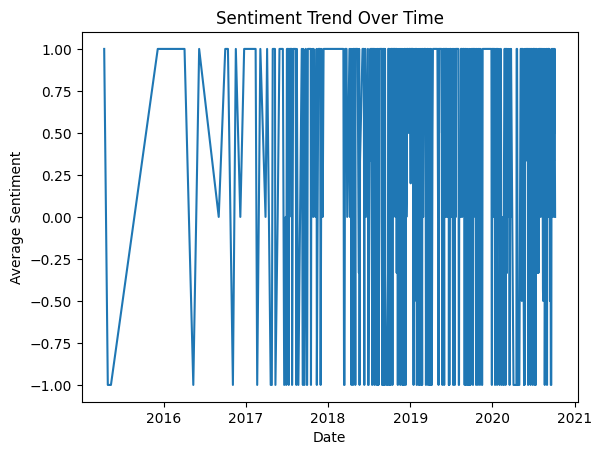

                               SARIMAX Results                                
Dep. Variable:              sentiment   No. Observations:                  686
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -785.313
Date:                Sun, 01 Dec 2024   AIC                           1576.626
Time:                        01:23:53   BIC                           1590.214
Sample:                             0   HQIC                          1581.884
                                - 686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.038      0.439      0.661      -0.058       0.092
ma.L1         -0.9994      0.042    -23.806      0.000      -1.082      -0.917
sigma2         0.5747      0.040     14.414      0.0

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sentiment over time
df['date'] = pd.to_datetime(df['date'])
df_trend = df.groupby('date')['sentiment'].mean().reset_index()

# Plot sentiment trends
plt.plot(df_trend['date'], df_trend['sentiment'])
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.show()

# ARIMA model
arima_model = ARIMA(df_trend['sentiment'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast next 10 periods
forecast = arima_result.forecast(steps=10)
print("Forecasted Sentiments:", forecast)


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('amazon_reviews.csv')  # Update with your dataset path

# Preprocess dataset
df['cleaned_review'] = df['review'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0 if x == 3 else 2)


In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

# Load and preprocess dataset
# Ensure DataFrame contains clean text and sentiment labels
df = pd.read_csv("amazon_reviews.csv")  # Replace with your dataset path
df['cleaned_review'] = df['review'].astype(str)  # Ensure all reviews are strings
df['sentiment'] = df['rating'].apply(lambda x: 0 if x < 3 else 1 if x == 3 else 2)  # Adjust to sentiment categories

# Prepare dataset for Hugging Face Trainer
def tokenize_function(examples):
    return tokenizer(examples['cleaned_review'], padding="max_length", truncation=True)

# Convert DataFrame to Dataset
hf_dataset = Dataset.from_pandas(df[['cleaned_review', 'sentiment']])

# Tokenize dataset
hf_dataset = hf_dataset.map(tokenize_function, batched=True, remove_columns=['cleaned_review'])
hf_dataset = hf_dataset.rename_column("sentiment", "labels")  # Rename column for compatibility with Trainer
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_dir="./logs",  # Logging directory
    save_strategy="epoch",  # Save checkpoint every epoch
)

# Fine-tune model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset["train"],
    eval_dataset=hf_dataset["test"],
    tokenizer=tokenizer,  # Add tokenizer for proper preprocessing during evaluation
)
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2782 [00:00<?, ? examples/s]

d:\Hub\MLmodel\venv\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\kisla\AppData\Local\Temp\ipykernel_860\3096714360.py:40: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


  0%|          | 0/837 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.4520338773727417, 'eval_runtime': 980.4367, 'eval_samples_per_second': 0.568, 'eval_steps_per_second': 0.071, 'epoch': 1.0}
{'loss': 0.5009, 'grad_norm': 0.479704886674881, 'learning_rate': 8.052568697729989e-06, 'epoch': 1.79}


  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.27649542689323425, 'eval_runtime': 715.8911, 'eval_samples_per_second': 0.778, 'eval_steps_per_second': 0.098, 'epoch': 2.0}


  0%|          | 0/70 [00:00<?, ?it/s]

{'eval_loss': 0.2160128355026245, 'eval_runtime': 770.1482, 'eval_samples_per_second': 0.723, 'eval_steps_per_second': 0.091, 'epoch': 3.0}
{'train_runtime': 37292.2365, 'train_samples_per_second': 0.179, 'train_steps_per_second': 0.022, 'train_loss': 0.39391917567099294, 'epoch': 3.0}


TrainOutput(global_step=837, training_loss=0.39391917567099294, metrics={'train_runtime': 37292.2365, 'train_samples_per_second': 0.179, 'train_steps_per_second': 0.022, 'total_flos': 1756282063334400.0, 'train_loss': 0.39391917567099294, 'epoch': 3.0})

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("amazon_reviews.csv")  # Replace with the path to your dataset

# Preprocess dataset (clean text and ensure the column exists)
df['cleaned_review'] = df['review'].astype(str)  # Convert to string if not already


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)

# Define batch size
batch_size = 16  # Adjust based on system memory
results = []

# Process the dataset in smaller batches
for i in range(0, len(df), batch_size):
    batch = df['cleaned_review'][i:i + batch_size].tolist()
    
    # Tokenize the batch
    inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
    
    # Move inputs and model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Collect predictions
    predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()  # Move predictions back to CPU
    results.extend(predictions)

# Add predictions to the DataFrame
df['bert_sentiment'] = results


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
print(results)

[np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2)